In [51]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy import signal

<IPython.core.display.Javascript object>


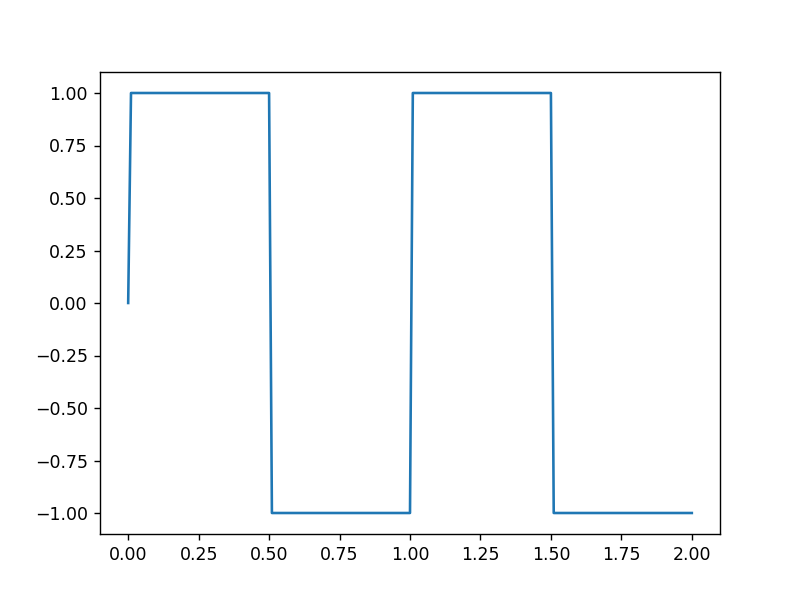

In [46]:
t = np.linspace(0,2,201) #two cycles, 100 points each
sqwave = np.sign(np.sin(2*np.pi*t)) #an actual square wave
fig, ax = plt.subplots()
ax.plot(t,sqwave)

In [48]:
@interact_manual
def fs(n=""):
    n = int(n)
    sq = np.zeros(len(t)) #preallocate the output array
    for h in np.arange(1,n,2):
        sq += (4/(np.pi*h))*np.sin(2*np.pi*h*t)
    fig, ax = plt.subplots()
    ax.plot(t,sq, t,sqwave)


interactive(children=(Text(value='', description='n'), Button(description='Run Interact', style=ButtonStyle())…

interactive(children=(FloatSlider(value=0.0, description='n', max=14.0, step=2.0), Output()), _dom_classes=('w…

In [36]:
@interact_manual
def square_dfs(N=(0,40),M=(0,50)):
    %matplotlib notebook
    n = range(-30,30)
    sqr = lambda x:1 if 0<=(x+M)%N<=2*M else  0
    c0 = [sqr(i) for i in n]
    fig, ax = plt.subplots()
    ax.stem(n,c0)
    k = np.array(range(-10,11))
    ak = lambda k: np.sin((2*np.pi*k/N)*(M+0.5))/(N*np.sin((2*np.pi*k)/(2*N))) if k%N!=0 else (2*M+1)/N

    C0 = [ak(i) for i in k]


    fig, ax = plt.subplots()
    ax.stem(k,C0)
    plt.xlabel("$ 2*\pi/N$")

interactive(children=(IntSlider(value=20, description='N', max=40), IntSlider(value=25, description='M', max=5…

In [34]:
@interact_manual
def triangle(w=FloatSlider(min=0.1,max=1,step=0.001,description='$w_0\pi$')):
    t = np.linspace(0, 4*np.pi, 500)
    w0=w*np.pi
    tr = lambda x: max((w0-abs(x))/w0,0)
    mtri = [tr(i-2*np.pi*round(i/(2*np.pi))) for i in t]
    #print([i%(np.pi) for i in t])
    fig, ax = plt.subplots()
    ax.plot(t/np.pi,mtri)
    plt.xlabel("$\omega$")
    plt.ylabel("$X_0 (e^j\omega)$")

interactive(children=(FloatSlider(value=0.1, description='$w_0\\pi$', max=1.0, min=0.1, step=0.001), Button(de…

In [53]:
t = np.linspace(0, 3, 500)
triangle = signal.sawtooth(2 * np.pi  * t, 0.5)
@interact_manual
def fs(n=FloatSlider(min=0,max=14,step=2,value=0)):
    n = int(n)
    sq = np.zeros(len(t)) #preallocate the output array
    for h in np.arange(1,n,2):
        sq += (-1)**((h-1)/2)*np.sin(2*np.pi*h*(t+0.75))/h**2
    fig, ax = plt.subplots()
    ax.plot(t,(8/np.pi**2)*sq, t,triangle)
    ax.grid(True, which='both')

interactive(children=(FloatSlider(value=0.0, description='n', max=14.0, step=2.0), Button(description='Run Int…